# AlgoBOWL Submission Demo

Authors:
1. Hanna Barringer
1. Saad Elbeleidy
1. Austin Leo

This notebook is a demo of how our AlgoBOWL submission works.

The problem is as follows:

1. Given `n` points with `x,y,z` coordinates, group them into `k` clusters. 
1. All points have integer values for their coordinates between `-1000` and `1000`
1. `k` is between 2 and 20

For our submission we must create:
1. a difficult set of points for other teams to solve
1. solutions to all the other teams' submissions

We will begin by explaining our set up of the problem and our solution methodology then discuss how we developed our difficult problem for other teams to solve.

In [29]:
# First, we import the function definitions from our main file to be able to access them.
from main import *
%matplotlib inline

Let's generate a random demo sample file, then get the input values from it.

In [32]:
genSample("demoSample.txt")
demoN, demoK, demoPoints = getValsFromTxt("demoSample.txt")
print("We have {} points and {} sets to place them in.".format(demoN, demoK))

We have 507 points and 11 sets to place them in.


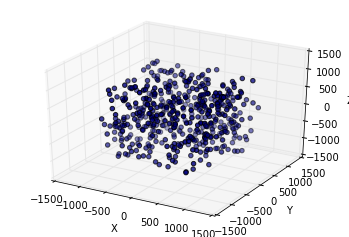

In [33]:
plotSolutionSet(demoPoints)

## Finding the best solution

Our solution runs multiple algorithms that are suited for specific cases and returns the best result. One of our algorithms randomly selects starting points and then applies a nearest neightbour algorithm to determine the points that should belong in that cluster. Below is an example of it applied to the demo dataset. Each color denotes a grouped set:

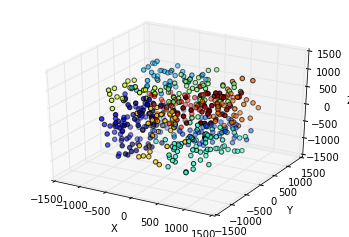

In [34]:
# Code may take a while to run
demoScore, demoSet = useAlgorithm(randomStartingPointAlgorithm, demoN, demoK, demoPoints, 100)
plotSolutionSet(demoPoints, demoSet)

Another algorithm starts with random coordinates but iterates on them by using new starting points based on the mean of the points in a set. Here is an example:

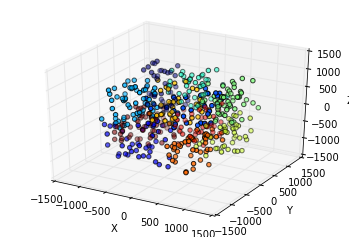

In [35]:
# Code may take a while to run
demoScore, demoSet = useAlgorithm(iterativeStartingPointsAlgorithm, demoN, demoK, demoPoints, 10)
plotSolutionSet(demoPoints, demoSet)

We then iterated on the above algorithms to find better ways of determining starting points for our clusters as well as determining better ways of improving the starting points after a successful set was determined. This lead to the below algorithms.

Starting from the most extreme points in the dataset:

Iterating by getting the cluster centroid:

Iterating by weighting less dense areas of a cluster more heavily:

Combining the above algorithms and simply returning the best result allowed us to rank as follows:


## Creating A Difficult Problem To Solve

In order to create a difficult problem for others to solve, we developed a set of 999 points with 15 identifiable clusters. The points are grouped in 8 clear clusters as well as seven difficult to find clusters.

The 8 clear clusters are points around the extremes of some axes.

The 7 difficult clusters are clusters of 2 points each around the middle region of some axes.

Below is a plot of the difficult point set:

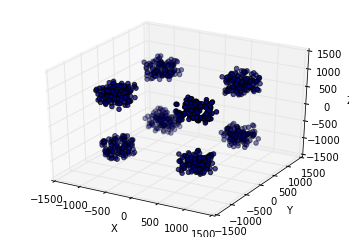

In [36]:
genToughSample("toughDemoSample.txt")
toughN, toughK, toughPoints = getValsFromTxt("toughDemoSample.txt")
plotSolutionSet(toughPoints)

Using our combined algorithms we can solve this problem as shown below:

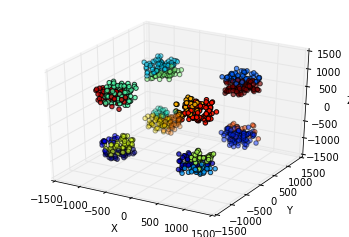

In [37]:
# Code may take a while to run
toughScore, toughSet = useAlgorithm(randomStartingPointAlgorithm, toughN, toughK, toughPoints, 1000)
plotSolutionSet(toughPoints, toughSet)

Our tough problem resulted in groups scoring as follows:


## Conclusion

Our algorithms offer a basic starting point for solving a clustering problem with k clusters.